In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Data from https://academic.oup.com/mnras/article/475/1/1093/4733293

In [2]:
#for |z| > 270 pc
metal_rich='1.6±0.5,11.3±1.3 * 2.4±0.4,14.9±1.4 * 3.0±0.3,14.0±1.3 * \
3.5±0.3,12.2±1.1 * 4.1±0.3,15.4±1.1 * 4.6±0.3,16.2±1.0*5.3±0.4,17.7±0.9*\
5.9±0.4,20.0±1.1* 6.7±0.6,23.2±1.7* 8.0±0.8,24.8±2.0* 8.9±0.6,23.2±3.0'

In [3]:
metal_poor='3.1±0.7,17.0±1.6 *3.9±0.3 ,19.2±1.7 * 4.6±0.3 ,18.1±1.3 *\
5.2±0.4 ,18.7±1.0 * 5.8±0.4 ,24.2±1.1 *6.7±0.5 ,32.8±1.7 *7.5±0.6 ,\
39.5±2.2 *8.6±0.7,44.2±2.7 * 10.1±0.6,47.0±3.7 '

In [4]:
def reformat_sub_sub_string(st):
    return [float(st.split('±')[0]),  float(st.split('±')[-1])]
def reformat_sub_string(st):
    vals=st.split(',') 
    return {'age':reformat_sub_sub_string(vals[0]),
    'sigma_w':reformat_sub_sub_string(vals[-1])}
def reformat_string(st):
    vals=st.split('*')
    return [reformat_sub_string(x) for x in vals]

In [5]:
poor_vals=np.array(reformat_string(metal_poor))

In [6]:
#all


In [7]:
df_poor=pd.DataFrame.from_records(poor_vals)

In [8]:
#df_poor
def avr_yu(sigma, verbose=False, disk='thin', direction='vertical', height='above'):
    verboseprint = print if verbose else lambda *a, **k: None
    #the dictionary has thin disk and thick disk
    #thin disk  AVR is for [Fe<H] <-0.2 and two different fits for 
    #|z| > 270 pc and |z|<270
    _, tau1, sigma10= 0.385, 0.261, 57.15747
    
    beta_dict={'thin':{'vertical': [[0.54, 0.13], [0.48, 0.14]],
              'azimuthal':[[0.30, 0.09],[0.4, 0.12]],
              'radial': [ [0.28, 0.08], [0.36, 0.28]]},
               'thick':{'vertical': [[0.56, 0.14], [0.51, 0.15]],
              'azimuthal':[[0.34, 0.12],[0.42, 0.14]],
              'radial': [ [0.34, 0.17], [0.39, 0.13]]}}
    
    beta=beta_dict[disk][direction][0]
    if  height=='below':
         beta=beta_dict[disk][direction][1]
    if height=='median':
        vals=np.array([beta_dict[disk][direction][0], beta_dict[disk][direction][1]])
        beta=[(vals[:,0]).mean(), (vals[:,1]**2).sum()**0.5]
    verboseprint("Assuming Yu & Liu 2018, {} disk {} velocities ".format(disk, direction))
    if np.isscalar(sigma):
        betas=(np.random.normal(beta[0], beta[-1], 10000))
        #sigmas= sigma**(np.random.normal(beta[0], beta[-1], 10000))
        #sigmas=((sigma/sigma10)**(1/betas))*(10+tau1)-tau1
        sigmas= sigma**(betas)
        return np.nanmedian(sigmas), np.nanstd(sigmas)
    else:
        betas=(np.random.normal(beta[0], beta[-1], (10000, len(sigma))))
        #sigmas= sigma**(np.random.normal(beta[0], beta[-1], 10000))
        #sigmas=((sigma/sigma10)**(1/betas))*(10+tau1)-tau1
        sigmas= sigma**(betas)
        #sigmas= sigma**(np.random.normal(beta[0], beta[-1], (10000, len(sigma))))
        return np.vstack([np.nanmedian(sigmas, axis=0), np.nanstd(sigmas, axis=0)])

In [9]:
mx=np.nanmax(np.vstack(df_poor.sigma_w.values)[:,0])
mn=np.nanmin(np.vstack(df_poor.sigma_w.values)[:,0])

Text(0.5, 0, '')

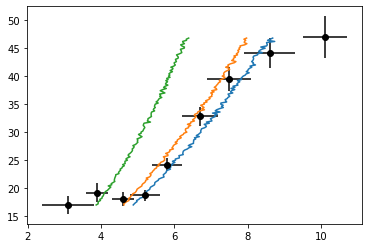

In [10]:
plt.errorbar(np.vstack(df_poor.age.values)[:,0],
             np.vstack(df_poor.sigma_w.values)[:,0],
             xerr=np.vstack(df_poor.age.values)[:,1],
             yerr=np.vstack(df_poor.sigma_w.values)[:,1], fmt='o', color='k')
plt.plot(avr_yu(np.arange(mn, mx, 0.2), disk='thick')[0], np.arange(mn, mx, 0.2))
plt.plot(avr_yu(np.arange(mn, mx, 0.2), disk='thin')[0], np.arange(mn, mx, 0.2))
plt.plot(avr_yu(np.arange(mn, mx, 0.2), height='below')[0], np.arange(mn, mx, 0.2))

#plt.plot(avr_yu(np.arange(mn, mx),  height='below')[0], np.arange(mn, mx))
#plt.plot(avr_yu(np.arange(mn, mx, 0.2),  height='median', disk='thick')[0], np.arange(mn, mx, 0.2))
plt.xlabel('')


In [11]:
avr_yu(14., verbose=True, disk='thin', direction='vertical', height='above')

Assuming Yu & Liu 2018, thin disk vertical velocities 


(4.166164080745701, 1.5620739800325172)

In [12]:
avr_yu(14., verbose=True, disk='thick', direction='vertical', height='above')

Assuming Yu & Liu 2018, thick disk vertical velocities 


(4.360364258153445, 1.8120162758703753)

In [13]:
import popsims

Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database


In [16]:
 d=popsims.make_systems(model_name='baraffe1998', recompute=False, range=[0.01, 0.1, 8, 14.0])

In [20]:
d=pd.read_csv('/users/caganze/research/wisps/evmodels/baraffe1998.csv')

In [32]:
d

,mass,age,temperature,gravity,luminosity,Mv,Mr,Mi,Mj,Mh,Mk,Ml,Mm,metallicity,y,l_mix
0,0.02,0.00102,2542,3.794,-2.49,15.50,14.08,11.87,8.78,8.18,7.76,7.16,7.43,0.0,0.275,1.0
1,0.02,0.00115,2538,3.807,-2.50,15.56,14.13,11.92,8.82,8.21,7.80,7.20,7.46,0.0,0.275,1.0
2,0.02,0.00128,2535,3.821,-2.52,15.61,14.19,11.97,8.85,8.25,7.84,7.24,7.50,0.0,0.275,1.0
3,0.02,0.00144,2530,3.834,-2.54,15.67,14.24,12.01,8.89,8.29,7.87,7.27,7.54,0.0,0.275,1.0
4,0.02,0.00161,2527,3.847,-2.55,15.73,14.29,12.06,8.93,8.33,7.91,7.31,7.58,0.0,0.275,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,1.00,2.51622,6070,4.375,4.29,4.39,4.06,3.77,3.38,3.12,3.10,NaN,NaN,-0.5,0.250,1.0
5296,1.00,3.18167,6097,4.350,4.20,4.31,3.98,3.69,3.30,3.05,3.03,NaN,NaN,-0.5,0.250,1.0
5297,1.00,4.00556,6129,4.313,4.09,4.19,3.87,3.58,3.20,2.95,2.93,NaN,NaN,-0.5,0.250,1.0
5298,1.00,5.01958,6160,4.253,3.92,4.01,3.69,3.42,3.04,2.79,2.77,NaN,NaN,-0.5,0.250,1.0
